In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline

In [11]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [12]:
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [13]:
team_1 = 'Mumbai Indians'
team_2 = 'Kolkata Knight Riders'

In [14]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

# Winning Probability of Teams

Text(0.5, 1.0, 'Percentage of Winning')

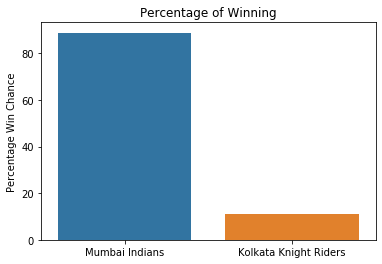

In [16]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

In [17]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

# Predicted wickets loss by MI between 6-15 overs

Since, the wickets lossing probability is generaly less, we will consider value between minimum wickets lost and 25% quartile value.

In [34]:
MI_wk = delivery[delivery['over'].isin(range(6,16))].groupby('match_id').sum()['player_dismissed']
print("Predicted Wickets lost by MI in overs 6-15 is : {}".format((MI_wk.min()+MI_wk.describe()[4])/2))

Predicted Wickets lost by MI in overs 6-15 is : 2.0


# Predicted No. of 4s by KKR

Text(61, 14.008196721311476, "Average Number of 4's by KKR per match: 14")

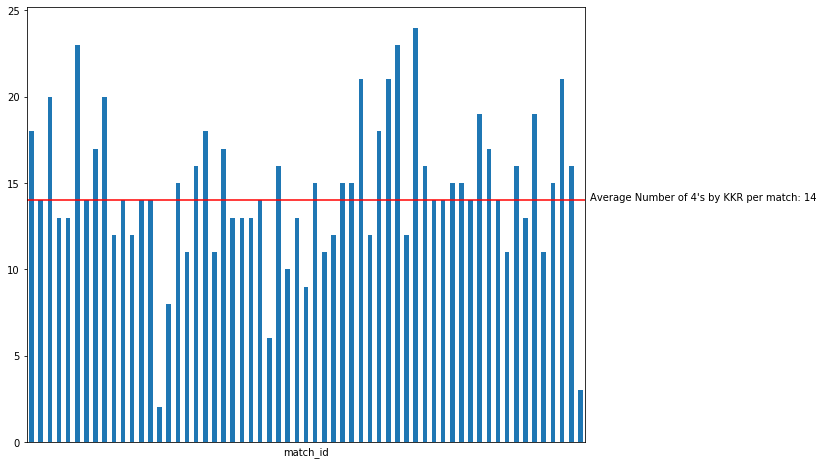

In [92]:
kkr_fours = delivery[(delivery['batting_team'] == team_2) & (delivery['batsman_runs']==4)].groupby('match_id').sum()['batsman_runs']/4
plt.figure(figsize=(10,8))
kkr_fours.plot(kind='bar')
plt.xticks([])
plt.axhline(y=math.floor(kkr_fours.mean()), color='red')
plt.text(x=61, y=kkr_fours.mean()-0.5, s=f"Average Number of 4's by KKR per match: {math.floor(kkr_fours.mean())}")

# Predicted total scores

In [124]:
avg_score_mi = delivery[delivery['batting_team'].isin([team_1])].groupby('match_id').sum()['total_runs'].mean()
avg_score_kkr = delivery[delivery['batting_team'].isin([team_2])].groupby('match_id').sum()['total_runs'].mean()
print("Average runs scored in today's match:", avg_score_kkr+avg_score_mi)

Average runs scored in today's match: 335.78688524590166


# RG Sharma dismissal probability

Text(0.5, 0, 'Disimissal Kind')

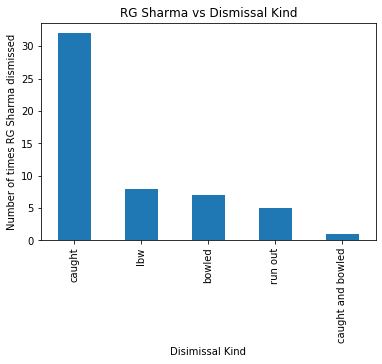

In [130]:
sharma_dismmissal_kind = delivery[(delivery['batsman']=='RG Sharma') & (delivery['dismissal_kind']!=0)]['dismissal_kind'].value_counts()
sharma_dismmissal_kind.plot(kind='bar')
plt.title("RG Sharma vs Dismissal Kind")
plt.ylabel("Number of times RG Sharma dismissed")
plt.xlabel("Disimissal Kind")

# Summary

- Data was cleaned and filtered. The data from the year 2016 to 2019 was taken and all the non-required columns were dropped. Using the "winner" column of the dataset, the percentage chances of winning between MI and KKR was calculated. 
- Since the wickets losing probability is generally less, we considered value between minimum wickets lost and 25% quartile value of the number of lost wickets to estimate the wickets loss of MI during 6 to 15 overs.
- The average number of 4s hit by KKR per match was considered to be an estimate of the number of 4s KKR will hit today.
- The average scores made by both the teams per match against different teams is considered and summed to predict today's total score.
- RG Sharma has more chances of getting dismissed by caught because previous matches the chances of getting caught was high as compared to others. 